In [2]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")  # silence warnings

sm = StructureModel()

In [3]:
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join('../utils')))

In [4]:

file_path = '../data/features.csv'
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head(5)

,id,order_id,driver_id,driver_action,lat,lng,driver_location,trip_origin,trip_destination,trip_Start_time,trip_end_time,trip_distance,trip_to_driver_distance,trip_time,trip_speed,isHoliday,isWeekend
0,1,392001,243828,accepted,6.602207,3.270465,"6.6022066,3.2704649","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.694264,0 days 00:03:37,0.096702,0,0
1,2,392001,243588,rejected,6.592097,3.287445,"6.5920972,3.2874447","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.551694,0 days 00:03:37,0.096702,0,0
2,3,392001,243830,rejected,6.596133,3.281784,"6.5961334,3.2817841","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.786777,0 days 00:03:37,0.096702,0,0
3,4,392001,243539,rejected,6.596142,3.280526,"6.5961416,3.2805263","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,0.692054,0 days 00:03:37,0.096702,0,0
4,5,392001,171653,rejected,6.609232,3.288800,"6.6092317,3.2887999","6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,20.984319,1.621848,0 days 00:03:37,0.096702,0,0


In [5]:
filtered_df = data.loc[:, ['driver_action','isWeekend', 'isHoliday', 'trip_to_driver_distance', 'trip_time', 'trip_speed']]
filtered_df

,driver_action,isWeekend,isHoliday,trip_to_driver_distance,trip_time,trip_speed
0,accepted,0,0,0.694264,0 days 00:03:37,0.096702
1,rejected,0,0,1.551694,0 days 00:03:37,0.096702
2,rejected,0,0,0.786777,0 days 00:03:37,0.096702
3,rejected,0,0,0.692054,0 days 00:03:37,0.096702
4,rejected,0,0,1.621848,0 days 00:03:37,0.096702
...,...,...,...,...,...,...
1555712,rejected,0,0,3.263377,0 days 01:42:47,0.001316
1555713,rejected,0,0,3.399641,0 days 01:42:47,0.001316
1555714,rejected,0,0,3.002545,0 days 01:42:47,0.001316
1555715,rejected,0,0,3.263377,0 days 01:42:47,0.001316


In [6]:
sm = StructureModel()

In [7]:
#  Transform and encode

import numpy as np

struct_data = filtered_df.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

['driver_action', 'trip_time']


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

,driver_action,isWeekend,isHoliday,trip_to_driver_distance,trip_time,trip_speed
0,0,0,0,0.694264,200,0.096702
1,1,0,0,1.551694,200,0.096702
2,1,0,0,0.786777,200,0.096702
3,1,0,0,0.692054,200,0.096702
4,1,0,0,1.621848,200,0.096702


In [9]:
# Non numeric 
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)

[]


In [10]:
# Scale and normalize numerical data
from sklearn import preprocessing

x = struct_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [11]:
df

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.001058,0.025025,0.018849
1,1.0,0.0,0.0,0.002365,0.025025,0.018849
2,1.0,0.0,0.0,0.001199,0.025025,0.018849
3,1.0,0.0,0.0,0.001055,0.025025,0.018849
4,1.0,0.0,0.0,0.002472,0.025025,0.018849
...,...,...,...,...,...,...
1555712,1.0,0.0,0.0,0.004974,0.724349,0.000255
1555713,1.0,0.0,0.0,0.005182,0.724349,0.000255
1555714,1.0,0.0,0.0,0.004577,0.724349,0.000255
1555715,1.0,0.0,0.0,0.004974,0.724349,0.000255


In [12]:
# Apply the NOTEARS algorithm to learn the structure

from causalnex.structure.notears import from_pandas

sm = from_pandas(df)

In [13]:
df = df.rename(columns={0: "driver_action", 1: "isWeekend", 2: "isHoliday", 3: "trip_to_driver_distance",4: "trip_time", 5: "trip_speed"}, errors="raise")

In [15]:
sm = from_pandas(df)

In [ ]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)
viz.show("../screenshots/01_fully_connected.html")

In [17]:
sm.remove_edges_below_threshold(0.8)

In [ ]:
# sm.remove_edges_below_threshold(0.8)

viz = plot_structure(
    sm,
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)

viz.toggle_physics(False)
viz.show("../screenshots/02_fully_connected.html")

In [19]:
df.corr()

,driver_action,isWeekend,isHoliday,trip_to_driver_distance,trip_time,trip_speed
driver_action,1.000000,-0.006193,NaN,0.025384,-0.008571,-0.041942
isWeekend,-0.006193,1.000000,NaN,-0.109155,0.017512,-0.000583
isHoliday,NaN,NaN,NaN,NaN,NaN,NaN
trip_to_driver_distance,0.025384,-0.109155,NaN,1.000000,0.005526,0.035473
trip_time,-0.008571,0.017512,NaN,0.005526,1.000000,-0.237367
trip_speed,-0.041942,-0.000583,NaN,0.035473,-0.237367,1.000000


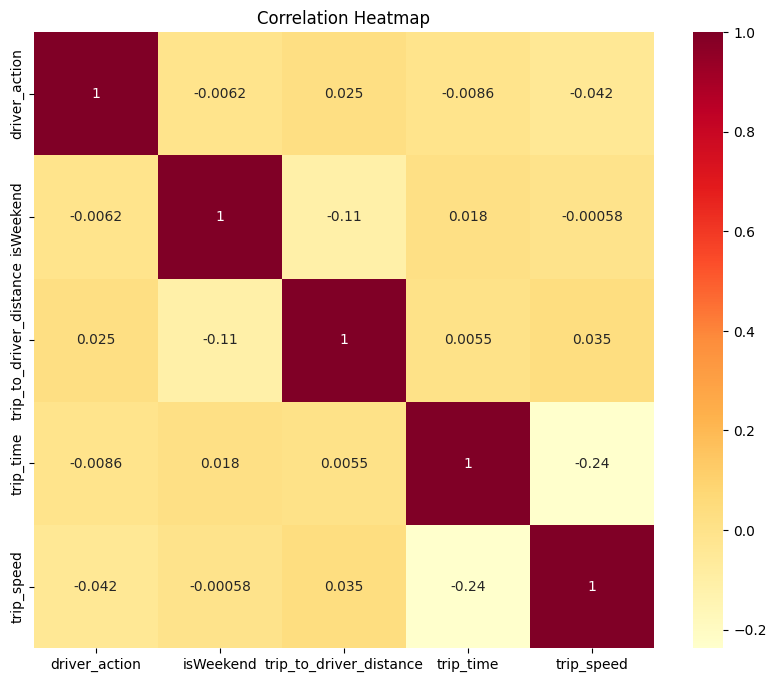

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
# and a column named 'isHolyday'

# Create a new DataFrame excluding the 'isHolyday' column
df_heatmap = df.drop('isHoliday', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()